## !pip install WordCloud

In [12]:
docs1 = "sugar is bad to consume. My sister like to have sugar, but not my dad"
docs2 = "my father spends a lot of time driving and my sister around dance practice"
docs3 = "Doctors suggest that driving may cause increase in blood pressure"

docs = [docs1, docs2, docs3]

In [13]:
from wordcloud import WordCloud

In [14]:
long_string = ",".join(docs)
wordcloud = WordCloud(background_color="white")
wordcloud.generate(long_string)

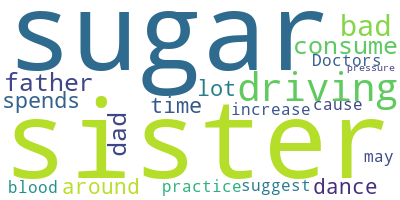

In [15]:
wordcloud.to_image()

In [23]:
import pandas as pd

In [24]:
people = pd.read_csv('people_data.csv', nrows = 5000)

In [25]:
people.head()

,URI,name,text
0,<http://dbpedia.org/resource/Bill_Clinton>,Bill Clinton,william jefferson bill clinton born william je...
1,<http://dbpedia.org/resource/Polyana_L%C3%B3pez>,Polyana L%C3%B3pez,polyana lpez born circa 1985 is an argentine a...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [32]:
long_string = ",".join(list(people['text'].values))

In [33]:
wordcloud.generate(long_string)

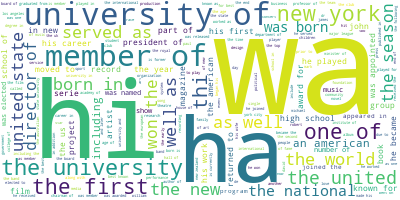

In [34]:
wordcloud.to_image()

## Topic Modelling
- Summarization (its not)
- Brunch of documents - will be able to generate title for it
- Tries to give you a score of all words in the corpus
- LDA (Latent Dirichlet Allocation)
- Multiple Algos for topic modellin, LDA - most popular

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [65]:
computer = """A computer is a machine that can be instructed to carry out sequences of arithmetic or logical operations automatically via computer programming. Modern computers have the ability to follow generalized sets of operations, called programs. These programs enable computers to perform an extremely wide range of tasks. A "complete" computer including the hardware, the operating system (main software), and peripheral equipment required and used for "full" operation can be referred to as a computer system. This term may as well be used for a group of computers that are connected and work together, in particular a computer network or computer cluster.""" 
food = """Jalebi, also known as zulbia, jilapi, mushabak and zalabia, is an Indian sweet snack popular all over South Asia, and the Middle East. It is made by deep-frying maida flour (plain flour or all-purpose flour) batter in pretzel or circular shapes, which are then soaked in sugar syrup. This dessert can be served warm or cold. They have a somewhat chewy texture with a crystallized sugary exterior coating. Citric acid or lime juice is sometimes added to the syrup, as well as rose water. Jalebi is eaten with curd or rabri (North India) along with optional other flavours such as kewra (scented water)."""

In [66]:
doc_complete = [computer,food]

In [67]:
number_topics = 2

#tfidf
tf = TfidfVectorizer(stop_words="english")
tf_data = tf.fit_transform(doc_complete)

#LDA
lda = LatentDirichletAllocation(n_components=number_topics)
lda.fit(tf_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [68]:
lda.components_
#these are the score of the generated features

array([[0.59746414, 0.61412771, 0.61412771, 0.59746414, 0.61412771,
        0.59746414, 0.61412771, 0.59746414, 0.59746414, 0.61412771,
        0.61412771, 0.61412771, 0.59746414, 0.61412771, 0.61412771,
        0.59746414, 1.10505657, 0.79883604, 0.59746414, 0.61412771,
        0.61412771, 0.61412771, 0.61412771, 0.61412771, 0.61412771,
        0.59746414, 0.59746414, 0.61412771, 0.59746414, 0.61412771,
        0.84854108, 0.59746414, 0.61412771, 0.59746414, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61412771, 0.59746414,
        0.73083869, 0.61412771, 0.61412771, 0.61412771, 0.61412771,
        0.61412771, 0.59746414, 0.59746414, 0.61412771, 0.59746414,
        0.61412771, 0.59746414, 0.61412771, 0.59746414, 0.61412771,
        0.59746414, 0.59746414, 0.6975699 , 0.61412771, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61412771, 0.61412771,
        0.59746414, 0.6975699 , 0.61412771, 0.61412771, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61

In [69]:
lda.components_.shape
#2 is number of topics
#97 is the number of features

(2, 97)

In [70]:
tf_data.shape
#2 is number of documents
#97 is the number of features

(2, 97)

In [71]:
tf.get_feature_names()
#These are all features

['ability',
 'acid',
 'added',
 'arithmetic',
 'asia',
 'automatically',
 'batter',
 'called',
 'carry',
 'chewy',
 'circular',
 'citric',
 'cluster',
 'coating',
 'cold',
 'complete',
 'computer',
 'computers',
 'connected',
 'crystallized',
 'curd',
 'deep',
 'dessert',
 'east',
 'eaten',
 'enable',
 'equipment',
 'exterior',
 'extremely',
 'flavours',
 'flour',
 'follow',
 'frying',
 'generalized',
 'group',
 'hardware',
 'including',
 'india',
 'indian',
 'instructed',
 'jalebi',
 'jilapi',
 'juice',
 'kewra',
 'known',
 'lime',
 'logical',
 'machine',
 'maida',
 'main',
 'middle',
 'modern',
 'mushabak',
 'network',
 'north',
 'operating',
 'operation',
 'operations',
 'optional',
 'particular',
 'perform',
 'peripheral',
 'plain',
 'popular',
 'pretzel',
 'programming',
 'programs',
 'purpose',
 'rabri',
 'range',
 'referred',
 'required',
 'rose',
 'scented',
 'sequences',
 'served',
 'sets',
 'shapes',
 'snack',
 'soaked',
 'software',
 'somewhat',
 'south',
 'sugar',
 'sugary'

In [72]:
lda.components_

array([[0.59746414, 0.61412771, 0.61412771, 0.59746414, 0.61412771,
        0.59746414, 0.61412771, 0.59746414, 0.59746414, 0.61412771,
        0.61412771, 0.61412771, 0.59746414, 0.61412771, 0.61412771,
        0.59746414, 1.10505657, 0.79883604, 0.59746414, 0.61412771,
        0.61412771, 0.61412771, 0.61412771, 0.61412771, 0.61412771,
        0.59746414, 0.59746414, 0.61412771, 0.59746414, 0.61412771,
        0.84854108, 0.59746414, 0.61412771, 0.59746414, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61412771, 0.59746414,
        0.73083869, 0.61412771, 0.61412771, 0.61412771, 0.61412771,
        0.61412771, 0.59746414, 0.59746414, 0.61412771, 0.59746414,
        0.61412771, 0.59746414, 0.61412771, 0.59746414, 0.61412771,
        0.59746414, 0.59746414, 0.6975699 , 0.61412771, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61412771, 0.61412771,
        0.59746414, 0.6975699 , 0.61412771, 0.61412771, 0.59746414,
        0.59746414, 0.59746414, 0.61412771, 0.61

In [73]:
lda.components_[0].argsort()

array([31, 61, 59, 80, 56, 49, 51, 36,  0, 12, 47, 88, 15, 18,  7, 25, 94,
       93, 71, 39, 46, 35,  8, 87, 60, 69,  5, 55,  3, 74, 70, 53, 76, 65,
       34, 28, 33, 26, 20, 67, 43, 64, 52, 75, 58, 13, 50,  1, 14, 27, 21,
       41,  4, 85, 72, 96, 44, 42, 37, 81,  2, 45, 11, 77,  9, 68, 82, 63,
       73, 91, 79, 84, 38, 32, 54, 95, 89, 24,  6, 19, 78, 23, 48, 29, 62,
       22, 83, 10, 66, 90, 57, 92, 86, 40, 17, 30, 16])

In [74]:
#last 5 indexs are most important words
lda.components_[0].argsort()[-5:][::-1]

array([16, 30, 17, 40, 86])

In [75]:
all_features = tf.get_feature_names()

for each in lda.components_:
    index = each.argsort()[-5:][::-1]
    topic = ""
    for i in index:
        topic = topic + " " + all_features[i]
        
    print(topic)

 computer flour computers jalebi syrup
 computer computers programs used operations


## Example of argsort

In [76]:
import numpy as np

In [77]:
x = np.array([11,55,58,12])

In [78]:
x.argsort()

array([0, 3, 1, 2])